In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df.shape

(891, 12)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Total')

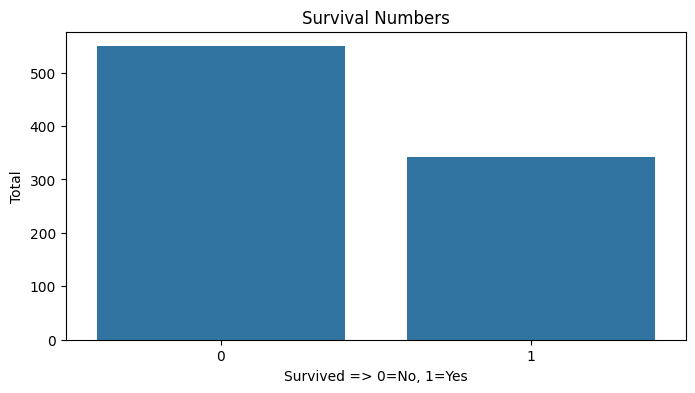

In [16]:
plt.figure(figsize=(8,4))          
sns.countplot(data=df, x='Survived')
plt.title("Survival Numbers")
plt.xlabel("Survived => 0=No, 1=Yes")
plt.ylabel("Total")

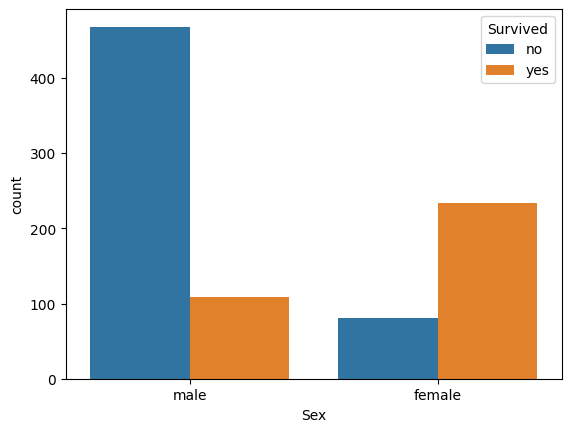

In [18]:
sns.countplot(data=df, x='Sex', hue='Survived')
plt.legend(title='Survived', labels=['no', 'yes'])

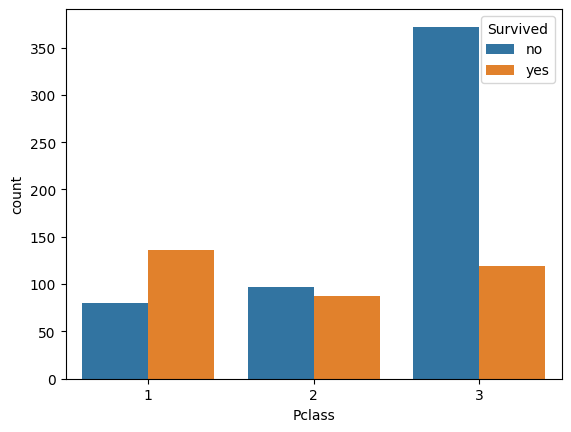

In [20]:
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.legend(title='Survived', labels=['no', 'yes'])

<Axes: xlabel='Embarked', ylabel='count'>

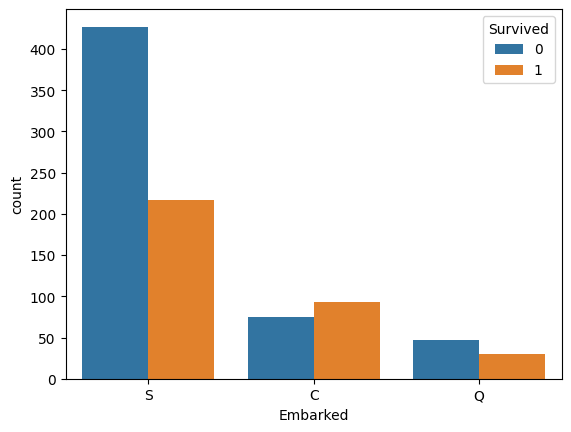

In [21]:
sns.countplot(data=df, x='Embarked', hue='Survived')

Text(0, 0.5, 'Frequency')

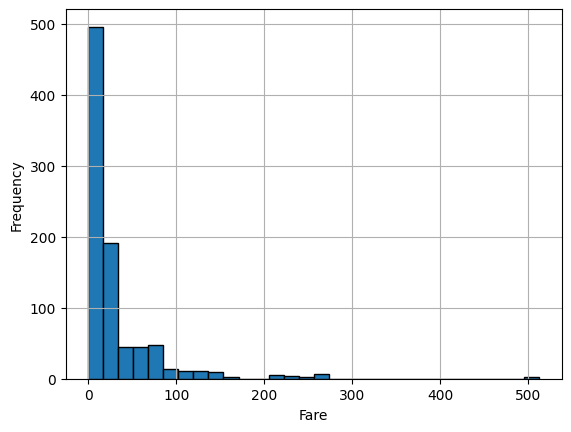

In [26]:
df['Fare'].hist(bins=30, edgecolor='black')
plt.xlabel('Fare')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

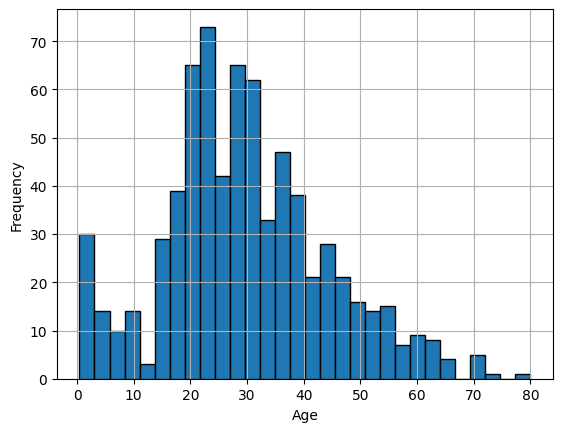

In [27]:
df['Age'].hist(bins=30, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

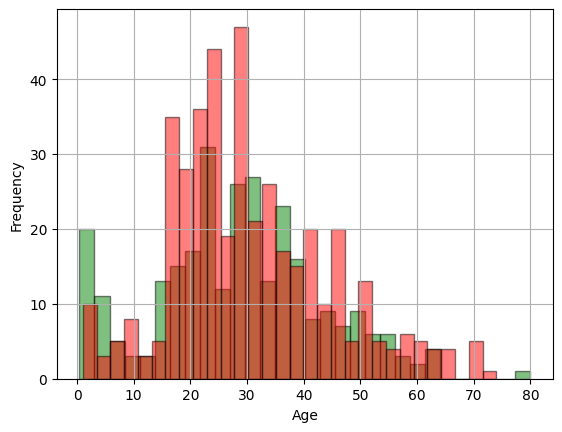

In [30]:
df[df['Survived'] == 1]['Age'].hist(bins=30, edgecolor='black', alpha=0.5, color='green')
df[df['Survived'] == 0]['Age'].hist(bins=30, edgecolor='black', alpha=0.5, color='red')
plt.xlabel('Age')
plt.ylabel('Frequency')

In [31]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

<Axes: xlabel='FamilySize', ylabel='count'>

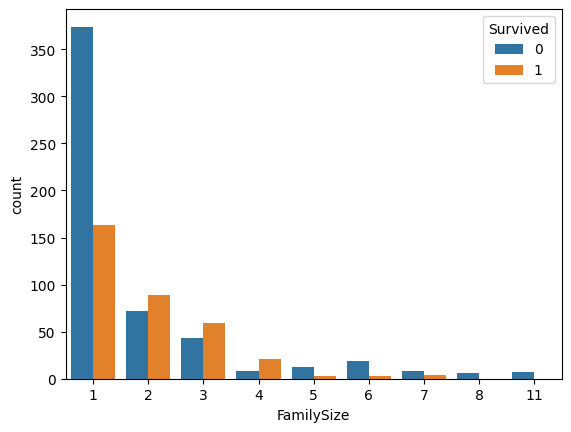

In [33]:
sns.countplot(data=df, x='FamilySize', hue='Survived')

In [34]:
num_df = df[['Survived', 'Pclass', 'Age', 'FamilySize', 'Fare']]

In [35]:
num_corr = num_df.corr()

<Axes: >

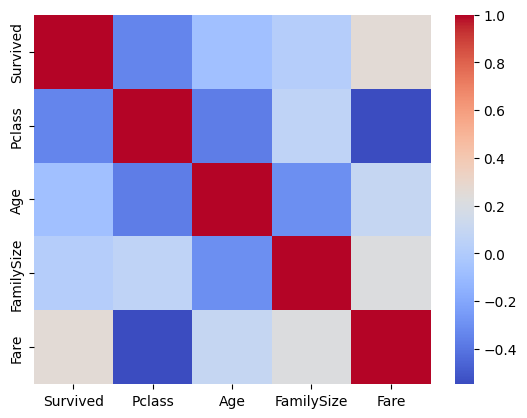

In [39]:
sns.heatmap(num_corr, cmap='coolwarm')

In [41]:
print("Survived by gender:")
print(df.groupby('Sex')['Survived'].agg(['mean', 'count']))

Survived by gender:
            mean  count
Sex                    
female  0.742038    314
male    0.188908    577


In [43]:
df.groupby('Sex')['Survived'].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64

In [48]:
# Fill missing Age values
df['Age'] = df['Age'].fillna(df['Age'].median())

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  FamilySize   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [50]:
df['Gender'] = df['Sex'].map({'male': 0, 'female': 1})

In [51]:
features = ['Pclass', 'Age', 'FamilySize', 'Fare', 'Gender']

In [52]:
X = df[features]

In [53]:
y = df['Survived']

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
# RandomForestClassifier 
model_rfc = RandomForestClassifier()
model_rfc.fit(X_train, y_train)
pred_rfc = model_rfc.predict(X_test)
accuracy_rfc = accuracy_score(y_test, pred_rfc)
print("Accuracy RandomForestClassifier: ", accuracy_rfc)

Accuracy RandomForestClassifier:  0.7988826815642458


In [61]:
# GradientBoostingClassifier
model_gbc = GradientBoostingClassifier()
model_gbc.fit(X_train, y_train)
pred_gbc = model_gbc.predict(X_test)
accuracy_gbc = accuracy_score(y_test, pred_gbc)
print("Accuracy GradientBoostingClassifier: ", accuracy_gbc)

Accuracy GradientBoostingClassifier:  0.8156424581005587


In [64]:
# SVC
model_svc = SVC(kernel='linear')
model_svc.fit(X_train, y_train)
pred_svc = model_svc.predict(X_test)
accuracy_svc = accuracy_score(y_test, pred_svc)
print("Accuracy SVC:", accuracy_svc)

Accuracy SVC: 0.7821229050279329


In [65]:
# LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
pred_lr = model_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, pred_lr)
print("Accuracy LogisticRegression:", accuracy_lr)

Accuracy LogisticRegression: 0.8044692737430168


In [66]:
cm_rfc = confusion_matrix(y_test, pred_rfc)
cm_rfc

array([[87, 18],
       [18, 56]])

Text(0.5, 23.52222222222222, 'Predicted')

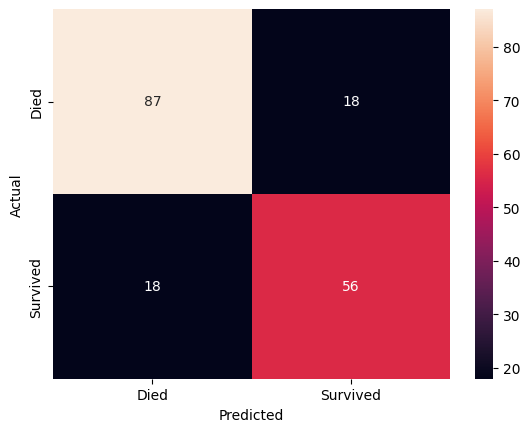

In [68]:
sns.heatmap(cm_rfc, annot=True, xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'])
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [69]:
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': model_rfc.feature_importances_
}).sort_values('Importance', ascending=False)

feature_importance

,Feature,Importance
3,Fare,0.292820
4,Gender,0.283395
1,Age,0.259026
0,Pclass,0.089514
2,FamilySize,0.075245


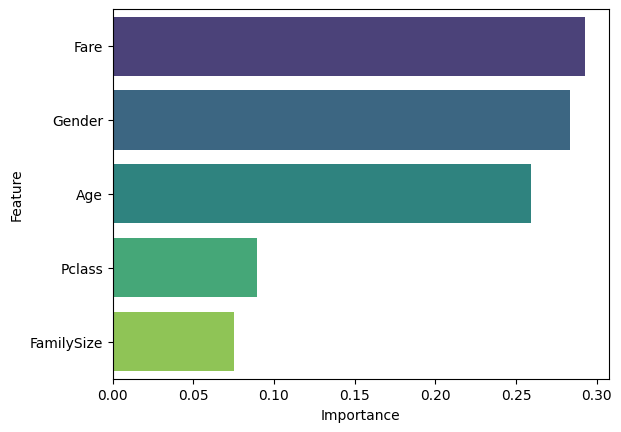

In [78]:
sns.barplot(data=feature_importance, x='Importance', y='Feature', hue='Feature', palette='viridis')
plt.savefig('feature_importance.png', dpi=300)